In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Integration
* Benchmark
* Classic MC
* Density MC
* plot of error

# Parameters

In [2]:
x_min = 0
x_max = np.pi/2

Ireal = 1

N = [100, 1000, 10000, 100000, 1000000]

df = pd.DataFrame(columns=['N','BenchmarkErr', 'ClassicMCErr','DensityMCErr'])

# Benchmark
Czyli liczby nie losowe, liczby o równym rozkładzie.

Error: 7.854187250744271e-05


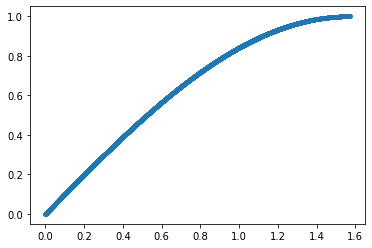

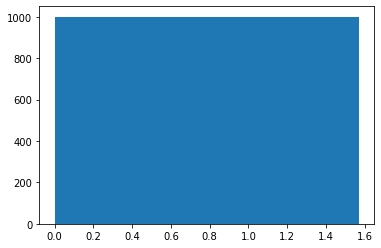

In [3]:
n = 10000

x = np.arange(x_min,x_max,x_max/n)
I = np.sum(np.sin(x))/n*x_max

print(f"Error: {abs(Ireal-I)}")


plt.plot(x, np.sin(x),'.')
plt.show()
plt.hist(x)
plt.show()

In [4]:
for n in N:
    x = np.arange(x_min,x_max,x_max/n)
    I = np.sum(np.sin(x))/n*x_max

    df = pd.concat([df, pd.DataFrame({'N':[n],'BenchmarkErr':[abs(Ireal-I)]})])

# classic MC

Error: 0.0010377376489338896


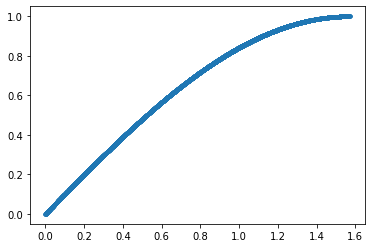

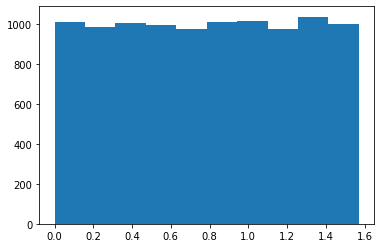

In [5]:
n = 10000

x = np.random.rand(n)*x_max
I = np.sum(np.sin(x))/n*x_max
print(f"Error: {abs(Ireal-I)}")


plt.plot(x, np.sin(x),'.')
plt.show()
plt.hist(x)
plt.show()

In [6]:
for n in N:
    x = np.random.rand(n)*x_max
    I = np.sum(np.sin(x))/n*x_max

    df = pd.concat([df, pd.DataFrame({'N':[n],'ClassicMCErr':[abs(Ireal-I)]})])

# Density

In [7]:
import scipy.stats as st

class my_pdf(st.rv_continuous):
    def _pdf(self,x):
        return (8*x)/(np.pi**2)

my_cv = my_pdf(a=0, b=np.pi/2, name='my_pdf')

In [8]:
my_cv.rvs(size=10000)

array([1.11891582, 0.92702221, 1.43529448, ..., 0.77249536, 0.98471996,
       0.59620976])

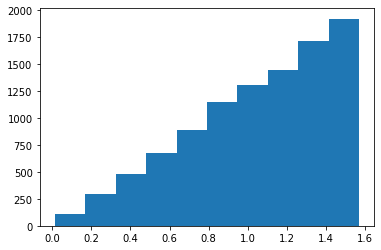

In [9]:
x = [my_cv.rvs() for _ in range(10000)]
plt.hist(x)
plt.show()

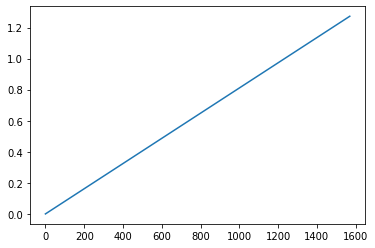

In [10]:
x = np.arange(0,x_max, 1/1000)
plt.plot((8*x)/(np.pi**2))
plt.show()

100000


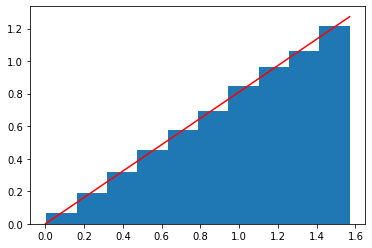

In [11]:
x = np.arange(0,x_max, 1/1000)
def f(x):
    return (8*x)/(np.pi**2)
f_max = max(f(x))

generatedNumbers = []
n = 100000

while len(generatedNumbers) < n:
    U1 = np.random.rand(1)[0]*x_max
    U2 = np.random.rand(1)[0]*f_max

    if U2 < f(U1):
        generatedNumbers.append(U1)

print(len(generatedNumbers))

plt.hist(generatedNumbers, density = 1)
plt.plot(x, f(x), color='red')
plt.show()

# Wnoski
Implementacje ze scipy działa, ale jest bardzo wolna, metoda eliminacji z poprzedniej labki jest znacznie szybsza.

In [12]:
def genNumbers(N, f):
    x = np.arange(0,x_max, 1/1000)
    f_max = max(f(x))
    generatedNumbers = []

    while len(generatedNumbers) < N:
        U1 = np.random.rand(1)[0]*x_max
        U2 = np.random.rand(1)[0]*f_max

        if U2 < f(U1):
            generatedNumbers.append(U1)
    return generatedNumbers

In [13]:
def f(x):
    return (8*x)/(np.pi**2)

for n in N:
    x = genNumbers(n,f)
    I = np.sum(np.sin(x))/n*x_max

    df = pd.concat([df, pd.DataFrame({'N':[n],'DensityMCErr':[abs(Ireal-I)]})])

In [27]:
n = 1000
x = genNumbers(n,f)
I = np.sum(np.sin(x))/n*x_max
I

0.7853603308027974

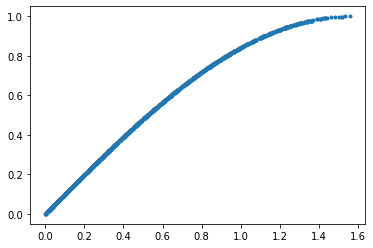

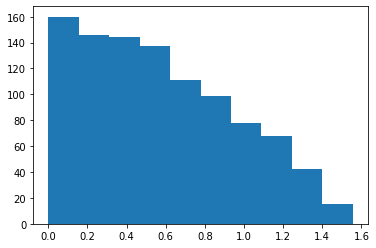

In [28]:
plt.plot(x, np.sin(x),'.')
plt.show()
plt.hist(x)
plt.show()

In [14]:
df

,N,BenchmarkErr,ClassicMCErr,DensityMCErr
0,100,0.007875,NaN,NaN
0,1000,0.000786,NaN,NaN
0,10000,0.000079,NaN,NaN
0,100000,0.000008,NaN,NaN
0,1000000,0.000001,NaN,NaN
0,100,NaN,0.032663,NaN
0,1000,NaN,0.002671,NaN
0,10000,NaN,0.001231,NaN
0,100000,NaN,0.00087,NaN
0,1000000,NaN,0.000449,NaN


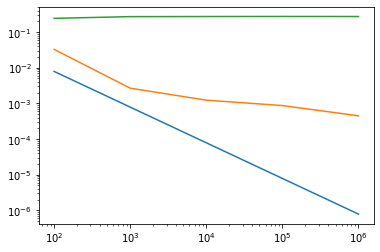

In [15]:
plt.loglog(df['N'], df['BenchmarkErr'])
plt.loglog(df['N'], df['ClassicMCErr'])
plt.loglog(df['N'], df['DensityMCErr'])

# Wsnioski
To oznacza, że najlepszą metodą jest metoda nie wykorzystująca MC. Coś nie pasuje...

In [16]:
def f(x):
    return np.cos(x)

for n in N:
    x = genNumbers(n,f)
    I = np.sum(np.sin(x))/n*x_max

    df = pd.concat([df, pd.DataFrame({'N':[n],'DensityNewMCErr':[abs(Ireal-I)]})])

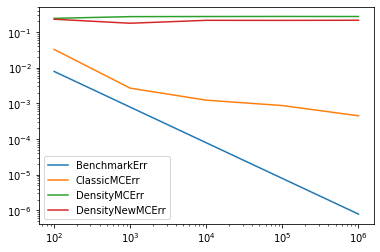

In [17]:
plt.loglog(df['N'], df['BenchmarkErr'])
plt.loglog(df['N'], df['ClassicMCErr'])
plt.loglog(df['N'], df['DensityMCErr'])
plt.loglog(df['N'], df['DensityNewMCErr'])
plt.legend(['BenchmarkErr', 'ClassicMCErr', 'DensityMCErr', 'DensityNewMCErr'])

# Wnioski
Może coś zrobiłem źle ale wydaje mi się, że lepszą funkcją gęstości prawdopodobieństwa będzie $cos(x)$, jako, że jest to pochodna z $sin(x)$. Według wykresu powyżej, moje przypuszczenia zostały potwierdzone.

Ogólnie wyniki nie są zgodne z oczekiwaniami, a najlepiej sprawuje się metoda benchmarkowa polegająca na równomiernym próbkowaniu. Może wynika to z tego, że całkujemy w 1D może coś jest źle. Jeśli coś jest bardzo źle to chętnie poprawię.